## Chapter 6. 학습 관련 기술들

* 신경망(딥러닝) 학습의 효율과 정확도를 높일 수 있는 방법들 

#### 6.1 매개변수 갱신
* 신경망 학습의 목적 : 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것
    * 매개 변수의 최적값을 찾는 문제 : 최적화(optimization)
        * 확률적 경사 하강법(SGD) : 기울기(미분)을 이용

* SGD
    * $W \leftarrow W - \eta\frac{\partial L}{\partial W}$
        * $W$(가중치 매개변수)를 갱신
        * $\eta$ : learning rate(학습률)

In [1]:
class SGD :
    def __init__(self, lr=0.01) :
        self.lr = lr
    
    # SGD과정에서 반복해서 불림 
    def update(self, params, grads) : 
        for key in params.keys() :
            params[key] -= self.lr * grads[key]


In [ ]:
# 진행방식 예시 
network = TwoLayerNet(...)
optimizer = SGD()     # optimizer가 SGD를 수행해서 최적화를 수행 

for i in range(10000) :
    ...
    x_batch, t_batch = get_mini_batch(...) # 미니배치
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads) # optimizer : 최적화를 행하는 자 (갱신은 optimizer가 수행하니 parameter와 grads만 넘겨주면 됨)
    ...

* SGD의 단점
    * 예시 그래프 : $f(x,y) = \frac{1}{20}x^2 + y^2$
        * 비등방성(anisotropy) 함수(방향에 따라 성질(기울기)이 달라지는 함수)에서는 탐색 경로가 비효율적
        * 이러한 단점을 개선해줄 수 있는 방법 
        
* Momentum : $V \leftarrow \alpha V - \eta \frac{\partial L}{\partial W}$ , $W \leftarrow W + V$
    * v : 물체의 속도
    * 기울기 방향으로 힘을 받아 물체가 가속된다는 물리 법칙을 나타냄
    * 공이 그릇 바닥을 구르듯 움직임 : SGD보다 지그재그가 덜함 

In [2]:
# 모멘텀 클래스 
class Momentum:
    def __init__(self, lr = 0.01, momentum = 0.9 ) :
        self.lr = lr
        self.momentum = momentum
        self.v = None # 초기화때는 아무 값도 담지 않고, 대신 update()가 처음 호출 될때 딕셔너리 변수로 저장
    
    def update(self, params, grads) :
        if self.v is None :
            self.v = {}
            for key, val in params.items() :
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys() :
            self.v[key] = self.momentum * self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]
            

* AdaGrad
    * 학습률($\eta$)값이 너무 작으면 학습시간이 길어지고, 너무 크면 학습이 제대로 이뤄지지 않음
        * 학습률 감소(learning rate decay) : 학습률을 효과적으로 정하는 기술(진행에 따라 학습률을 점차 줄여가는 방법)
    * AdaGrad : 각각의 매개변수의 원소마다 적응적으로(adaptive) 갱신정도(학습률)를 조정
        * $h\leftarrow h+\frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W}$
        * $W \leftarrow W -\eta \frac{1}{\sqrt{h}} \frac{\partial L}{\partial W}$
        * 최솟값을 향해 효율적으로 움직임 : 갱신강도도 빠르게 약해지고 지그재그 움직임도 점점 줄어듬 
 

In [3]:
# AdaGrad
class AdaGrad :
    def __init__(self, lr=0.01) :
        self.lr = lr
        self.h = None
    
    def update(self, params, grads) :
        if self.h is None :
            self.h = {}
            for key, val in params.items() :
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys() :
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7) # 0으로 나누는 사태를 방지하기위해 1e-7 더해줌
            

* Adam : 모멘텀과 AdaGrad를 융합한 듯한 방법, 매개변수 공간을 더욱 효율적으로 탐색
    * 하이퍼 파라미터의 '편향 보정'이 진행
    * 그릇 바닥을 구르듯 움직이지만 모멘텀 때보다 좌우 흔들림이 적음(갱신 강도를 적응적으로 조정하기 때문)
    * parameter 3개
        1. 학습률 $\alpha$
        2. 일차 모멘텀용 계수 $\beta_1$ = 0.9
        3. 이차 모멘텀용 계수 $\beta_2$ = 0.999 
        

* 어느 갱신 방법을 이용할 것인가?
    * 풀어야 할 문제가 무엇이냐에 따라 적합한 기법이 다름
        * 하이퍼 파라미터의 설정에 따라서도 결과가 바뀜 
        * 여러가지 상황을 고려해 여러 방법을 시도해 볼 것!

* MNIST 데이터셋으로 본 갱신 방법 비교
    * 일반적으로 나머지 세 기법에 비해 SGD의 학습 진도가 느림 
    * 하이퍼파라미터인 학습률과 신경망의 구조(층 깊이)에 따라 결과가 달라짐

#### 6.2 가중치의 초깃값
* 가중치의 초깃값 설정에 따라 신경망 학습의 성패가 결정되는 경우가 잦음 
    
* 초깃값을 0으로 하면 : 오버피팅을 억제해 범용 성능을 높이는 테크닉(가중치 감소: weight decay)
    * 가중치 감소 : 가중치 매개변수의 값이 작아지도록 학습하는 방법 
        * 가중치 값을 작게 하여 오버피팅이 일어나지 않게 하는 것
    * 가중치를 모두 0으로 설정하면 올바른 학습이 일어나지 않음 
        * 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문 
            * 가중치가 고르게 되어버리는 상황을 막기위해 0에 가까운 초깃값을 무작위로 설정해야함
        
* 은닉층의 활성화 값(활성화 함수의 출력 데이터) 분포
    * 가중치의 초깃값에 따라 은닉층 활성화 값들이 어떻게 변화하는지 확인
    * w = 1 : 기울기 소실
    * w = 0.01 : 표현력 제한
    * Xavier 초깃값 : 초깃값의 표준편차가 $\frac{1}{\sqrt n}$이 되도록 설정 ( n : 앞 층의 노드 수)
        * 층이 깊어질수록 형태가 다소 일그러지지만, 확실히 넓게 분포됨 
           * 각 층에 흐르는 데이터가 적당히 퍼져있고, 시그모이드 함수의 표현력도 제한받지 않으므로 학습이 효율적일 것으로 기대
           
    
    

In [33]:
# 은닉층의 활성화 값 분포(시그모이드 5층 신경망의 활성화값 분포) 
import numpy as np
import matplotlib.pyplot as plt

def relu(x) :
    return np.maximum(0, x)

def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100       # 각 은닉층의 노드(뉴런) 수
hidden_layer_size =5 # 은닉층이 5개
activations = {}     # 이곳에 각 층의 활성화 결과(활성화 값)을 저장 

for i in range(hidden_layer_size) :
    if i != 0 :
        x = activations[i-1]

    w = np.random.randn(node_num, node_num)*1 # 랜덤한 작은값 (1, 0.01)    
#   w = np.random.randn(node_num, node_num) / np.sqrt(node_num) # Xavier 초기값
    a = np.dot(x, w)
    z = sigmoid(a)
#   z = tanh(a)
#   z = relu(a)
    activations[i] = z

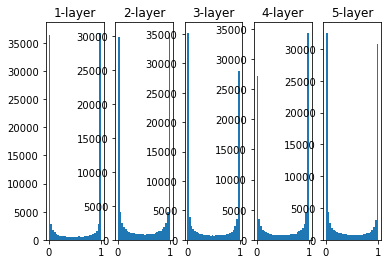

In [34]:
# 히스토그램 그리기
# 0과 1에 치우쳐 분포 : 기울기 소실(gradient vanishing)
for i, a in activations.items() :
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

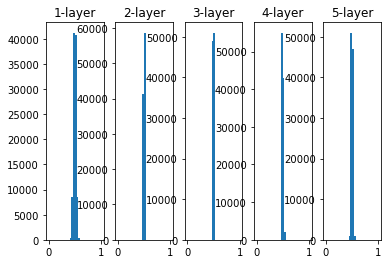

In [10]:
# w = np.random.randn(node_num, node_num) * 0.01
# 다수의 활성화 값들이 거의 같은 값을 출력 : vygusfurdmf wpgks 
for i, a in activations.items() :
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

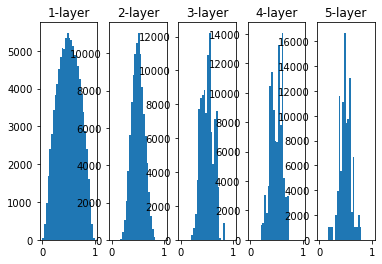

In [27]:
# Xavier 초깃값
# node_num = 100
# w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
for i, a in activations.items() :
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()


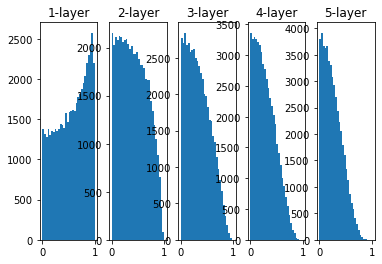

In [30]:
# Xavier 초깃값
# node_num = 100
# w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
# 오른쪽으로 갈수록 약간씩 일그러짐 : sigmoid대신 tanh함수를 사용하면 개선됨 : 활성화 함수용으로는 원점대칭함수가 바람직하다고 알려져 있음 
for i, a in activations.items() :
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()



* Xavier 초깃값은 활성화 함수가 선형인 것을 전제로 이끈 결과
    * sigmoid, tanh함수는 좌우 대칭, 중앙 부근이 선형

* ReLU를 사용할 때의 가중치 초깃값
    * ReLU에 특화된 초깃값을 이용해야함 : He 초깃값 
        * 발견한 인물 Kaiming He의 이름을 땀 
        * 표준편차가 $\sqrt{\frac{2}{n}}$인 정규분포를 사용 (n : 앞 계층의 노드가 n개)
        * ReLU는 음의 영역이 0이라서 더 넓게 분포시키기 위해 2배의 계수가 필요하다고 직관적으로 해석가능

In [ ]:
# 함수로 ReLU를 이용한 경우의 활성화 값 분포(표준편차가 0.01인 정규분포),Xavier 초깃값, He초깃값

In [39]:
# 은닉층의 활성화 값 분포(시그모이드 5층 신경망의 활성화값 분포) 
import numpy as np
import matplotlib.pyplot as plt

def relu(x) :
    return np.maximum(0, x)

def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100       # 각 은닉층의 노드(뉴런) 수
hidden_layer_size =5 # 은닉층이 5개
activations = {}     # 이곳에 각 층의 활성화 결과(활성화 값)을 저장 

for i in range(hidden_layer_size) :
    if i != 0 :
        x = activations[i-1]

#   w = np.random.randn(node_num, node_num)*0.01 # 랜덤한 작은값 (1, 0.01)    
#   w = np.random.randn(node_num, node_num) / np.sqrt(node_num) # Xavier 초기값
    w = np.random.randn(node_num, node_num)*np.sqrt(2) / np.sqrt(node_num) # Xavier 초기값
    a = np.dot(x, w)
    z = relu(a)
    activations[i] = z

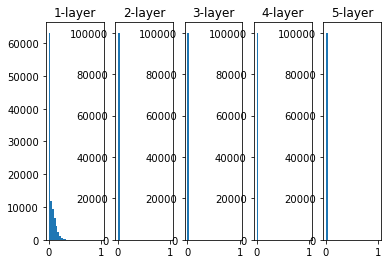

In [36]:
# std = 0.01
for i, a in activations.items() :
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

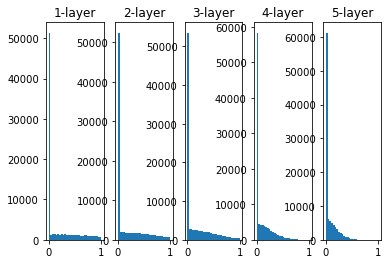

In [38]:
# Xavier
for i, a in activations.items() :
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

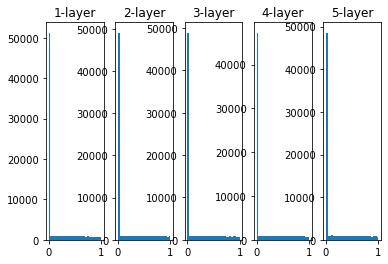

In [40]:
# He
for i, a in activations.items() :
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range = (0,1))
plt.show()

* MNIST 데이터셋으로 본 가중치 초깃값 비교
    * 소스코드

#### 6.3 배치 정규화
* 배치 정규화 알고리즘
* 배치 정규화의 효과

#### 6.4 바른 학습을 위해
* 오버피팅
* 가중치 감소
* 드롭아웃

#### 6.5 적절한 하이퍼 파라미터 값 찾기
* 검증 데이터
* 하이퍼파라미터 최적화
* 하이퍼파라미터 최적화 구현하기

#### 6.6 정리